# Global Histogram Equalization

In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Statistics

In [50]:
#Getsthe probability array
def calcProbabilityArray(data):
    height,width = img.shape[:2]
    unique, counts = np.unique(data, return_counts=True) #Pixel Value, Frequency of Pixel Value
    N = height * width # Number of Pixels
    counts = counts / N # Probability of each pixel value.
    arr  = [0 for k in range(256)]
    for i in range(len(counts)):
        arr[unique[i]] = counts[i]
    return arr

#Computes the hist table:  s_k
def calcHistTable(data, prob):
    s_ = [0 for i in range(256)] # arr = (prob_k, s_k)
    for k in range(256):
        s_k = 0
        for j in range(k+1):
            s_k+= prob[j]
        s_k *= 255
        s_k = round(s_k)
        s_[k] = int(s_k)
    return s_

#Replace all pixel values with their values from the hist_table
def replace(data, s_k):
    height,width = data.shape[:2]
    blank = np.zeros((height,width), np.uint8)
    for x in range(height):
        for y in range(width):
            curr = data[x][y]
            blank[x][y] = s_k[curr]
    return blank    


In [51]:
imgfile = '../../db/lena.png'
img= cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE  )
height,width = img.shape[:2]
prob = calcProbabilityArray(img) 
s_k = calcHistTable(img, prob)
new = replace(img, s_k)

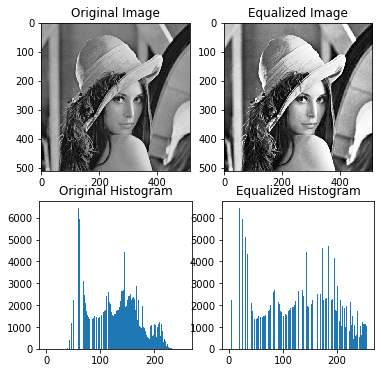

In [52]:
plt.figure(figsize = (6,6))
plt.subplot(221), plt.title("Original Image"), plt.imshow(img, cmap='gray')
plt.subplot(222), plt.title("Equalized Image"),plt.imshow(new, cmap='gray')
plt.subplot(223), plt.title("Original Histogram"),plt.hist(img.ravel(),256, [0, 256])
plt.subplot(224), plt.title("Equalized Histogram"),plt.hist(new.ravel(),256, [0, 256])
plt.show()